#### Data Analysis of Gainesville Traffic

find if there exists a correlation between streets with the most crashes and what the traffic count is on those streets

In [145]:
import pandas as pd
import matplotlib.pyplot as plt

In [146]:
path = 'TrafficData/'
crash_data = pd.read_csv(path + 'Traffic_Crashes.csv')
traffic_data = pd.read_csv(path + 'TrafficData20140522_20240829.csv')

In [147]:
traffic_data.head()

,the_geom,Count_Type,Station,STREET,BLOCK,ADT_2016,ADT_2015,ADT_2014,ADT_2013,ADT_2012,...,ADT_1112,DlyD1_1112,DlyD2_1112,Heavy_1112,PkAM_1112,AMD1_1112,AMD2_1112,PkPM_1112,PMD1_1112,PMD2_1112
0,POINT (-82.32454871717412 29.65991213468399),CI,"1,000",N MAIN ST,900,0,0,16070,0,0,...,"14,727",0.496299,0.503701,6%,938,0.417910,0.582090,"1,206",0.535655,0.464345
1,POINT (-82.32458341521964 29.66294157385959),CI,"1,001",N MAIN ST,"1,200",0,0,15881,0,0,...,"17,779",0.445919,0.554081,6%,"1,076",0.394052,0.605948,"1,516",0.447230,0.552770
2,POINT (-82.32389786657433 29.66964073503187),CI,"1,002",N MAIN ST,"1,900",0,0,15418,0,0,...,"12,028",0.424426,0.575574,51%,793,0.344262,0.655738,940,0.425532,0.574468
3,POINT (-82.31936445525942 29.68557613152471),CI,"1,003",N MAIN ST,"3,700",0,0,13880,0,0,...,"13,953",0.502759,0.497241,12%,"1,201",0.344713,0.655287,"1,248",0.610577,0.389423
4,POINT (-82.31937859840505 29.690140797111162),CI,"1,006",N MAIN ST,"4,000",0,0,6325,0,0,...,"5,785",0.522385,0.477615,16%,637,0.318681,0.681319,629,0.620032,0.379968


#### Filtering out all Crashes not on 2016

In [148]:
filtered_data = crash_data[crash_data['Crash Date'].str[6:10]=='2016']
filtered_data.head()

,Case Number,DHSMV Number,Crash Date,Crash Hour of Day,Crash minutes,Crash Day of Week,Address,Street Address number,Intersect Type,Distance,...,Total Motorcycles,Total Buses,Total Fatalities,Geox,Geoy,Longitude,Latitude,Location,City,State
6408,216009925,86285208,05/28/2016,11,7,Saturday,2011 NW 13TH ST,2011,NOT AT INTERSECTION,NaN,...,0,0,0,265477375,25033227,NaN,NaN,POINT (-82.32272 29.65198),Gainesville,Florida
25141,216017751,86593057,09/24/2016,10,41,Saturday,3616 SW 34TH ST,3616,T-INTERSECTION,NaN,...,0,0,0,264436650,23182755,NaN,NaN,POINT (-82.32272 29.65198),Gainesville,Florida
27485,216017590,86593082,09/22/2016,15,26,Thursday,N MAIN ST,3801,NOT AT INTERSECTION,NaN,...,0,0,0,266094150,25665897,-82.31939,29.68794,POINT (-82.32272 29.65198),Gainesville,Florida
27490,216021258,86594087,11/12/2016,19,11,Saturday,W UNIVERSITY AVE,NaN,NOT AT INTERSECTION,300 FEET,...,0,1,0,265308200,24356009,-82.32272,29.65198,POINT (-82.32272 29.65198),Gainesville,Florida
27492,216019607,86593590,10/20/2016,9,5,Thursday,W UNIVERSITY AVE,1412,NOT AT INTERSECTION,NaN,...,0,0,0,265438125,24368330,-82.30676,29.65195,POINT (-82.32272 29.65198),Gainesville,Florida


In [149]:
# Extract street name from the full address and remove all rows with NaN
crash_data['street_name'] = crash_data['Address'].str.extract(r'\((.*?)\)')
crash_data = crash_data.dropna(subset=['street_name'])
crash_data.head()

,Case Number,DHSMV Number,Crash Date,Crash Hour of Day,Crash minutes,Crash Day of Week,Address,Street Address number,Intersect Type,Distance,...,Total Buses,Total Fatalities,Geox,Geoy,Longitude,Latitude,Location,City,State,street_name
0,223008681,25598760,05/31/2023,18,27,Wednesday,CR 172 (NE 16TH AVE),NaN,FOUR-WAY INTERSECTION,NaN,...,0,0,266534175,24904878,-82.32272,29.65198,POINT (-82.32272 29.65198),Gainesville,Florida,NE 16TH AVE
1,223008367,25598688,05/25/2023,11,52,Thursday,SR 20 (NW 6TH ST),NaN,FOUR-WAY INTERSECTION,NaN,...,0,0,265727650,25696197,-82.32272,29.65198,POINT (-82.32272 29.65198),Gainesville,Florida,NW 6TH ST
2,223000500,25597022,01/11/2023,10,23,Wednesday,SR 121 (SW 34TH ST),NaN,NOT AT INTERSECTION,30 FEET,...,0,0,264441775,23820608,-82.32272,29.65198,POINT (-82.32272 29.65198),Gainesville,Florida,SW 34TH ST
3,223000480,25596992,01/10/2023,19,25,Tuesday,SR-121 (SW WILLISTON RD),NaN,T-INTERSECTION,10 FEET,...,0,0,264467950,22561378,-82.32272,29.65198,POINT (-82.32272 29.65198),Gainesville,Florida,SW WILLISTON RD
5,223000495,25597103,01/11/2023,8,7,Wednesday,SR 26 (W NEWBERRY RD),NaN,T-INTERSECTION,NaN,...,0,0,263265825,24592113,-82.32272,29.65198,POINT (-82.32272 29.65198),Gainesville,Florida,W NEWBERRY RD


#### Creating graph with amount of crashes on every street in gainesville

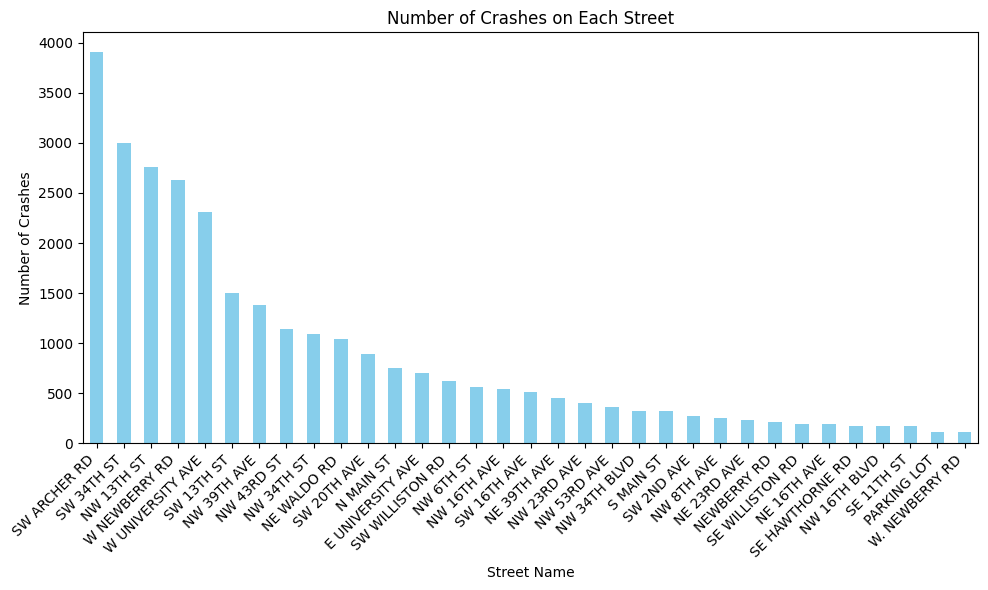

In [150]:
# Counts number of crashes and filters out streets with less than 100 crashes
crash_counts = crash_data['street_name'].value_counts()
crash_counts = crash_counts[crash_counts >= 100]

# Bar Graph
plt.figure(figsize=(10, 6))
crash_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Crashes on Each Street')
plt.xlabel('Street Name')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In [151]:
crash_counts.head()

street_name
SW ARCHER RD        3909
SW 34TH ST          2998
NW 13TH ST          2760
W NEWBERRY RD       2630
W UNIVERSITY AVE    2310
Name: count, dtype: int64

In [152]:
traffic_data.head()

,the_geom,Count_Type,Station,STREET,BLOCK,ADT_2016,ADT_2015,ADT_2014,ADT_2013,ADT_2012,...,ADT_1112,DlyD1_1112,DlyD2_1112,Heavy_1112,PkAM_1112,AMD1_1112,AMD2_1112,PkPM_1112,PMD1_1112,PMD2_1112
0,POINT (-82.32454871717412 29.65991213468399),CI,"1,000",N MAIN ST,900,0,0,16070,0,0,...,"14,727",0.496299,0.503701,6%,938,0.417910,0.582090,"1,206",0.535655,0.464345
1,POINT (-82.32458341521964 29.66294157385959),CI,"1,001",N MAIN ST,"1,200",0,0,15881,0,0,...,"17,779",0.445919,0.554081,6%,"1,076",0.394052,0.605948,"1,516",0.447230,0.552770
2,POINT (-82.32389786657433 29.66964073503187),CI,"1,002",N MAIN ST,"1,900",0,0,15418,0,0,...,"12,028",0.424426,0.575574,51%,793,0.344262,0.655738,940,0.425532,0.574468
3,POINT (-82.31936445525942 29.68557613152471),CI,"1,003",N MAIN ST,"3,700",0,0,13880,0,0,...,"13,953",0.502759,0.497241,12%,"1,201",0.344713,0.655287,"1,248",0.610577,0.389423
4,POINT (-82.31937859840505 29.690140797111162),CI,"1,006",N MAIN ST,"4,000",0,0,6325,0,0,...,"5,785",0.522385,0.477615,16%,637,0.318681,0.681319,629,0.620032,0.379968


For all values in ADT_2012 removes commas and converts to int

In [153]:
traffic_data['ADT_2012'] = traffic_data['ADT_2012'].str.replace(',', '').astype(int)

In [154]:
# Filters out elements == 0
filtered_traffic = traffic_data[traffic_data['ADT_2012']!=0]
filtered_traffic.head()

,the_geom,Count_Type,Station,STREET,BLOCK,ADT_2016,ADT_2015,ADT_2014,ADT_2013,ADT_2012,...,ADT_1112,DlyD1_1112,DlyD2_1112,Heavy_1112,PkAM_1112,AMD1_1112,AMD2_1112,PkPM_1112,PMD1_1112,PMD2_1112
6,POINT (-82.34742422259016 29.685662909569636),CI,"2,010",NW 19TH ST,"3,600",0,0,2454,0,2405,...,"2,405",0.520166,0.479834,7%,225,0.462222,0.537778,245,0.591837,0.408163
8,POINT (-82.32657964832495 29.664773630620704),CI,"2,014",NW 2ND ST,"1,400",0,0,0,0,2870,...,"2,870",0.520209,0.479791,2%,144,0.444444,0.555556,289,0.553633,0.446367
9,POINT (-82.32874824486974 29.65389358969202),CI,"2,013",NW 3RD AV,400,0,0,0,0,628,...,628,0.953822,0.046178,5%,31,0.967742,0.032258,72,0.944444,0.055556
11,POINT (-82.32790969497944 29.655631330502466),CI,"2,016",NW 3RD ST,500,0,0,0,0,559,...,559,0.946333,0.053667,5%,33,1.000000,0.000000,40,0.925000,0.075000
15,POINT (-82.33509472419685 29.660471502051294),CI,"2,021",NW 10TH ST,900,0,0,0,0,1002,...,"1,002",0.576846,0.423154,12%,77,0.155844,0.844156,120,0.816667,0.183333


In [157]:
#avg_traffic[filtered_traffic['STREET']] = filtered_traffic['ADT_2012'].value_counts()

#avg_traffic.head()

KeyError: "['NW 19TH ST' 'NW 2ND ST' 'NW 3RD AV' 'NW 3RD ST' 'NW 10TH ST'\n 'NW 10TH AV' 'NW 10TH AV' 'NW 12TH ST' 'NW 10TH AV' 'NW 18TH TER'\n 'NW 22ND ST' 'NW 31ST DR' 'NW 38TH ST' 'NW 29TH RD' 'NW 19TH ST'\n 'NW 2ND AV' 'NW 2ND ST' 'NW 2ND AV' 'NW 22ND ST' 'NW 1ST ST' 'NW 1ST AV'\n 'NW 5TH AV' 'NW 7TH AV' 'NW 4TH ST' 'NW 4TH ST' 'NW 22ND ST'\n 'NW 29TH TER' 'NW 41ST ST' 'NW 25TH PL' 'NW 28TH LN' 'NW 23RD BV'\n 'NW 31ST AV' 'NW 31ST BV' 'NE 10TH AV' 'NE 2ND ST' 'NE BOULEVARD'\n 'NE 28TH AV' 'NE 7TH ST' 'NE 31ST AV' 'NE 7TH ST' 'NE 31ST AV'\n 'NE 9TH ST' 'NE 15TH ST' 'NE 9TH ST' 'NE 9TH ST' 'NE 15TH ST'\n 'NE 15TH ST' 'NE 25TH ST' 'NE 2ND AV' 'NE 1ST ST' 'NE 3RD ST'\n 'NE 15TH ST' 'NE 1ST AV' 'NE 4TH AV' 'NE 2ND WAY' 'NE 2ND ST' 'SW 4TH AV'\n 'SW 4TH AV' 'SW 36TH ST' 'SW 4TH AV' 'SE 4TH AV' 'SE 7TH ST' 'SE 9TH ST'\n 'SE 3RD ST' 'SE 4TH AV' 'SE 2ND AV' 'SE 7TH ST' 'SE 3RD AV' 'SE 3RD AV'\n 'SE 15TH ST' 'SE 18TH ST' 'SE 24TH ST' 'NW 22ND ST' 'NE 9TH AV'\n 'NW 7TH AV' 'NE 12TH ST' 'NW 23RD TER' 'NW 39TH AV' 'NW 39TH AV'\n 'NW 39TH AV' 'NW 39TH AV' 'NW 39TH AV' 'NW 39TH AV' 'NE 39TH AV'\n 'NE 39TH AV' 'NE 39TH AV' 'NE 39TH AV' 'NW 23RD AV' 'NW 23RD AV'\n 'NE 23RD AV' 'NE 23RD AV' 'NE 23RD AV' 'NW 8TH AV' 'W NEWBERRY RD'\n 'W NEWBERRY RD' 'W NEWBERRY RD' 'W NEWBERRY RD' 'W UNIVERSITY AV'\n 'W UNIVERSITY AV' 'W UNIVERSITY AV' 'W UNIVERSITY AV' 'W UNIVERSITY AV'\n 'W UNIVERSITY AV' 'E UNIVERSITY AV' 'E UNIVERSITY AV' 'E UNIVERSITY AV'\n 'E UNIVERSITY AV' 'E UNIVERSITY AV' 'E UNIVERSITY AV' 'NE 55TH BV'\n 'SW 2ND AV' 'SW 2ND AV' 'SE HAWTHORNE RD' 'SE HAWTHORNE RD'\n 'SE HAWTHORNE RD' 'SW ARCHER RD' 'SW ARCHER RD' 'SW ARCHER RD'\n 'SW ARCHER RD' 'SW ARCHER RD' 'SW ARCHER RD' 'SW ARCHER RD'\n 'SW ARCHER RD' 'SW ARCHER RD' 'SW 16TH AV' 'SW 16TH AV' 'SW 16TH AV'\n 'SW 16TH AV' 'SE 16TH AV' 'I-75 N OF NEWBERRY' 'I-75 S OF NEWBERRY'\n 'I-75 S OF ARCHER' 'NW 22ND ST' 'NW 34TH ST' 'NW 34TH ST' 'NW 34TH ST'\n 'NW 34TH ST' 'SW 34TH ST' 'SW 34TH ST' 'SW 34TH ST' 'US441 N OF 34TH ST'\n 'US441 S OF 34TH ST' 'US441' 'NW 13TH ST' 'NW 13TH ST' 'NW 13TH ST'\n 'NW 13TH ST' 'NW 13TH ST' 'NW 13TH ST' 'SW 13TH ST' 'SW 13TH ST'\n 'SW 13TH ST' 'SW 13TH ST' 'US441 WILLISTON RAMP' 'US441 S OF WILLISTON'\n 'US441 S OF ROCKY PT' 'NW 6TH ST' 'NW 6TH ST' 'NW 6TH ST' 'NW 6TH ST'\n 'N MAIN ST' 'N MAIN ST' 'S MAIN ST' 'S MAIN ST' 'S MAIN ST'\n 'SW WILLISTON RD' 'SW WILLISTON RD' 'SW WILLISTON RD' 'NE WALDO RD'\n 'NE WALDO RD' 'NE WALDO RD' 'NE WALDO RD' 'NE WALDO RD' 'NE WALDO RD'\n 'SE WILLISTON RD' 'SE WILLISTON RD' 'SE WILLISTON RD' 'SE WILLISTON RD'\n 'SE HAWTHORNE RD' 'NW 39TH AV' 'SW 2ND AV' 'SW 34TH ST' 'SW 34TH ST'\n 'SW 34TH ST' 'W NEWBERRY RD' 'W NEWBERRY RD' 'NW 39TH AV' 'NW 39TH AV'\n 'NW 34TH ST' 'NE 39TH AV' 'E UNIVERSITY AV' 'SE HAWTHORNE RD' 'NW 6TH ST'\n 'NW 6TH ST' 'W UNIVERSITY AV' 'I-75 NB OFF RAMP NEW'\n 'I-75 SB OFF RAMP NEW' 'W NEWBERRY RD' 'W NEWBERRY RD' 'NW 13TH ST'\n 'NW 22ND ST' 'SW ARCHER RD' 'NW 34TH ST' 'NE 55TH BLVD'\n 'I-75 SB OFF RAMP WIL' 'I-75 SB ON RAMP WILL' 'I-75 NB ON RAMP WILL'\n 'I-75 NB OFF RAMP WIL' 'I-75 SB OFF RAMP ARC' 'I-75 NB ON RAMP ARCH'\n 'I-75 NB OFF RAMP ARC' 'I-75 SB ON RAMP ARCH' 'I-75 SB ON RAMP NEWB'\n 'I-75 NB ON RAMP NEWB'] not in index"

TypeError: no numeric data to plot

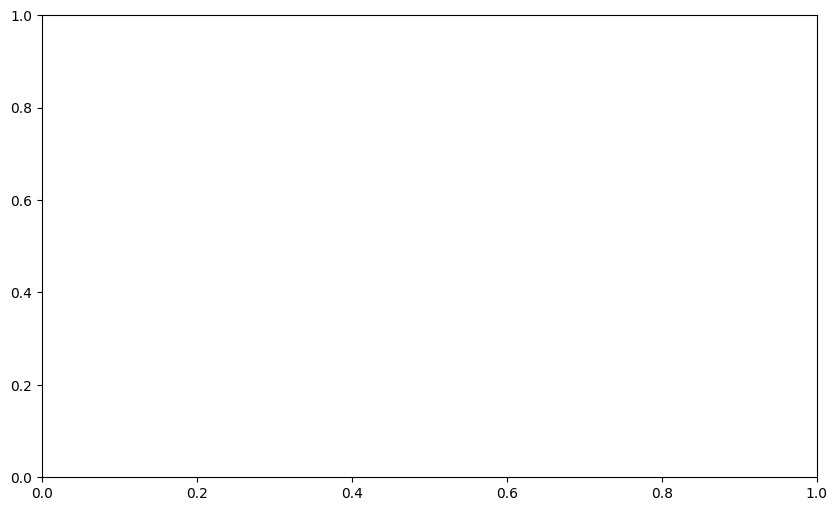

In [156]:

# Bar Graph
plt.figure(figsize=(10, 6))
avg_traffic.plot(kind='bar', color='skyblue')
plt.title('Average Daily Traffic')
plt.xlabel('Street Name')
plt.ylabel('Average Daily Traffic')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()